# Statistical properties

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

## Input coords

Text(0.5, 1.0, 'Histogram of input longitude')

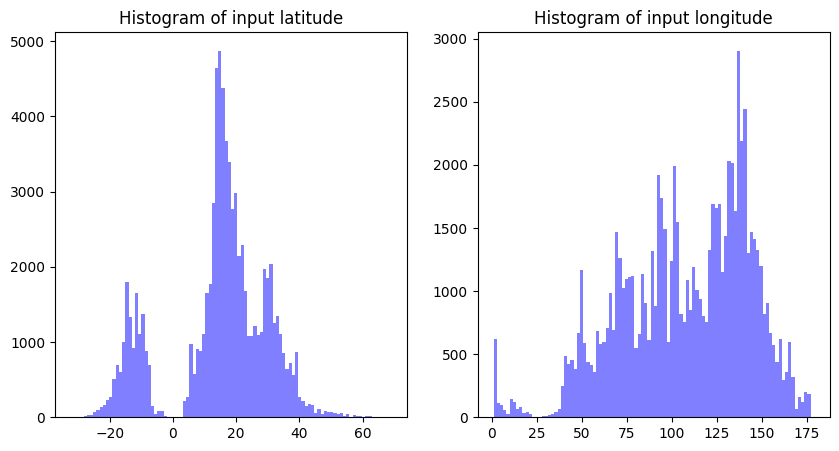

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax1, ax2 = axs

val1, val2 = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_coords_hist_0.npy"),\
                np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_coords_hist_1.npy")
edges1, edges2 = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_coords_bin_edges_0.npy"),\
                np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_coords_bin_edges_1.npy")
ax1.stairs(val1, edges1, fill=True, color='b', alpha=0.5)
ax1.set_title('Histogram of input latitude')

ax2.stairs(val2, edges2, fill=True, color='b', alpha=0.5)
ax2.set_title('Histogram of input longitude')

## Input lead time

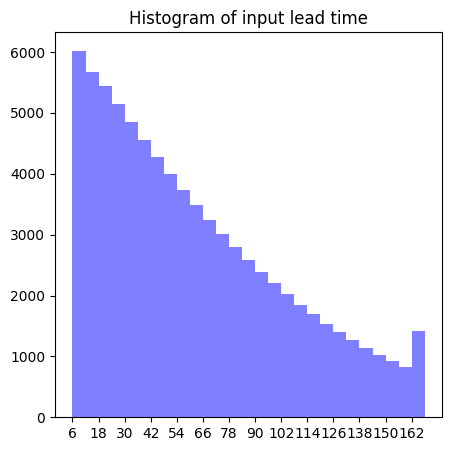

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

val = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_ldt_hist.npy")
edges = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_ldt_bin_edges.npy")
ax.stairs(val, edges, fill=True, color='b', alpha=0.5)
ax.set_title('Histogram of input lead time')
ax.set_xticks(np.arange(6, 174, 12))

## Targets

Text(0.5, 1.0, 'Histogram of target MSLP')

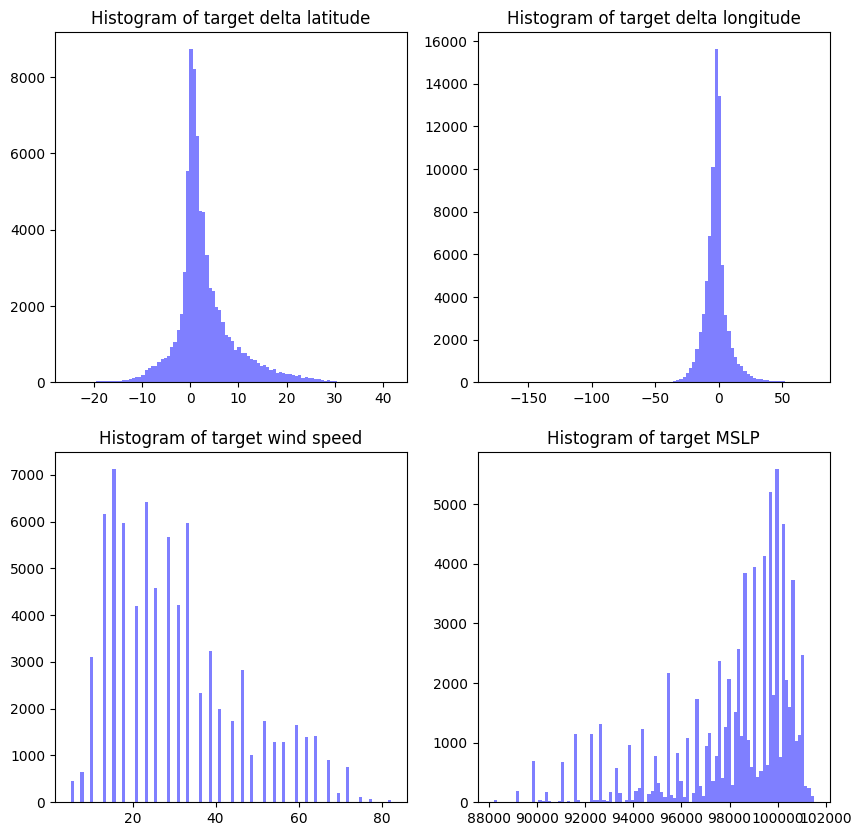

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
row1, row2 = axs
ax1, ax2 = row1
ax3, ax4 = row2

val1, val2, val3, val4 = \
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_hist_0.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_hist_1.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_hist_2.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_hist_3.npy")
edges1, edges2, edges3, edges4 = \
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_bin_edges_0.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_bin_edges_1.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_bin_edges_2.npy"),\
    np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_train_targets_bin_edges_3.npy")

ax1.stairs(val1, edges1, fill=True, color='b', alpha=0.5)
ax1.set_title('Histogram of target delta latitude')

ax2.stairs(val2, edges2, fill=True, color='b', alpha=0.5)
ax2.set_title('Histogram of target delta longitude')

ax3.stairs(val3, edges3, fill=True, color='b', alpha=0.5)
ax3.set_title('Histogram of target wind speed')

ax4.stairs(val4, edges4, fill=True, color='b', alpha=0.5)
ax4.set_title('Histogram of target MSLP')

# Seaborn statistics

## max wind vs target wind

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd

In [12]:
ldt = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_inp_ldt.npy")

max_ldt = 24
cond = ldt<=max_ldt
idxs = np.arange(len(ldt))[cond]
print(len(idxs), len(ldt))
fields = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_inp_fields.npy", mmap_mode='r')[idxs, 1:]
targets = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_targets.npy", mmap_mode='r')[idxs, 2]

22332 78510


In [13]:
u, v = fields[:, 0], fields[:, 1]
wnd_speed = np.sqrt(u**2 + v**2)
wnd_speed_max = np.max(wnd_speed, axis=(-1, -2))

Text(0.5, 0.98, 'Ldt <= 24hrs')

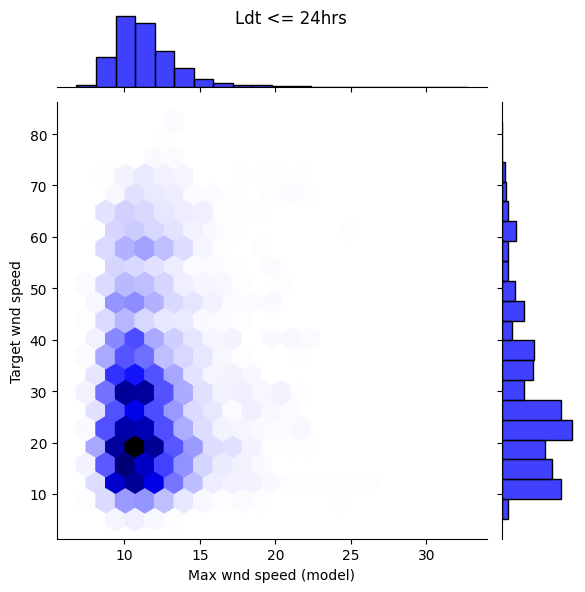

In [14]:
df_wind = pd.DataFrame({'Max wnd speed (model)': wnd_speed_max, 'Target wnd speed': targets})
g = sns.jointplot(data=df_wind, x="Max wnd speed (model)", y="Target wnd speed", kind='hex', gridsize=20, color='b', marginal_kws=dict(bins=20))

g.fig.suptitle(f"Ldt <= {max_ldt}hrs")

#g.ax_joint.set_yscale('log')
#g.ax_joint.set_xscale('log')

<Axes: xlabel='Max wnd speed (model)', ylabel='Target wnd speed'>

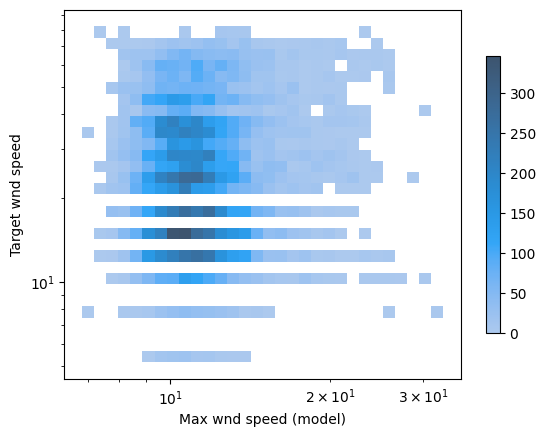

In [15]:
sns.histplot(
    data=df_wind, x="Max wnd speed (model)", y="Target wnd speed",
    bins=30, discrete=(False, False), log_scale=(True, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

## MSLP vs target pressure

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ldt = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_inp_ldt.npy")

max_ldt = 24
cond = ldt<=max_ldt
idxs = np.arange(len(ldt))[cond]
print(len(idxs), len(ldt))
model_pres = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_inp_fields.npy", mmap_mode='r')[idxs, 0]
target_pres = np.load("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/PostProcessing/graphcast_deterministic_train_targets.npy", mmap_mode='r')[idxs, 3]

22332 78510


Text(0.5, 0.98, 'Ldt <= 24hrs')

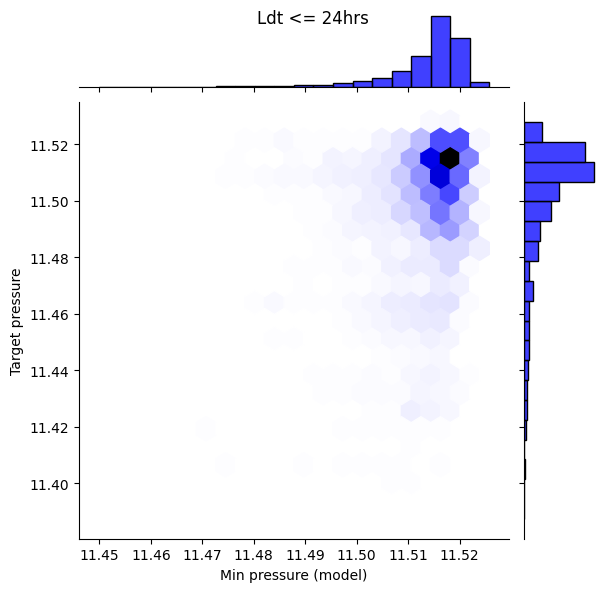

In [10]:
min_model_pres = np.min(model_pres, axis=(-1, -2))
df_pres = pd.DataFrame({'Min pressure (model)': np.log(min_model_pres), 'Target pressure': np.log(target_pres)})
g = sns.jointplot(data=df_pres, x='Min pressure (model)', y='Target pressure', kind='hex', gridsize=20, color='b', marginal_kws=dict(bins=20))

g.fig.suptitle(f"Ldt <= {max_ldt}hrs")

#g.ax_joint.set_yscale('log')
#g.ax_joint.set_xscale('log')

<Axes: xlabel='Min pressure (model)', ylabel='Target pressure'>

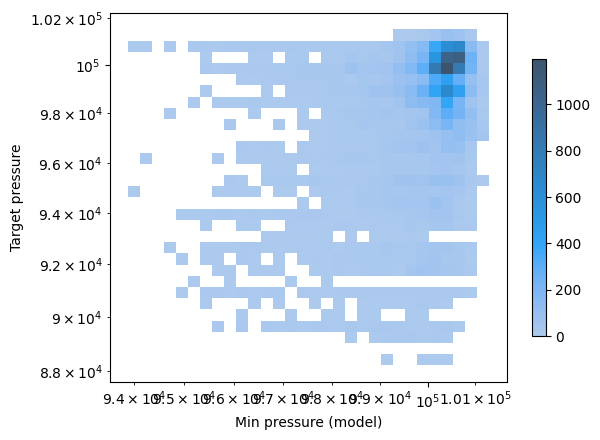

In [8]:
sns.histplot(
    data=df_pres, x='Min pressure (model)', y='Target pressure',
    bins=30, discrete=(False, False), log_scale=(False, False),
    cbar=True, cbar_kws=dict(shrink=.75),
)
plt.xticks(rotation=45)

# Follow tracks

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from plotting import follow_track


In [2]:
model_names = ["graphcast"]
leon_eline_2000_id = "2000032S11116"
kai_tak_2000_id = "2000185N15117"

lead_time = 6
var_name = ["mslp"]

follow_track(model_names, tc_id=leon_eline_2000_id, lead_time=lead_time, var_name=var_name, 
            cmap_mslp="Blues", cmap_wind='viridis', max_plots=4, plot_dir="/users/lpoulain/louis/plots/")

TypeError: unhashable type: 'list'

dict_keys(['Wind \nmagnitude0_0', 'Wind \nmagnitude0_1', 'Wind \nmagnitude0_2'])


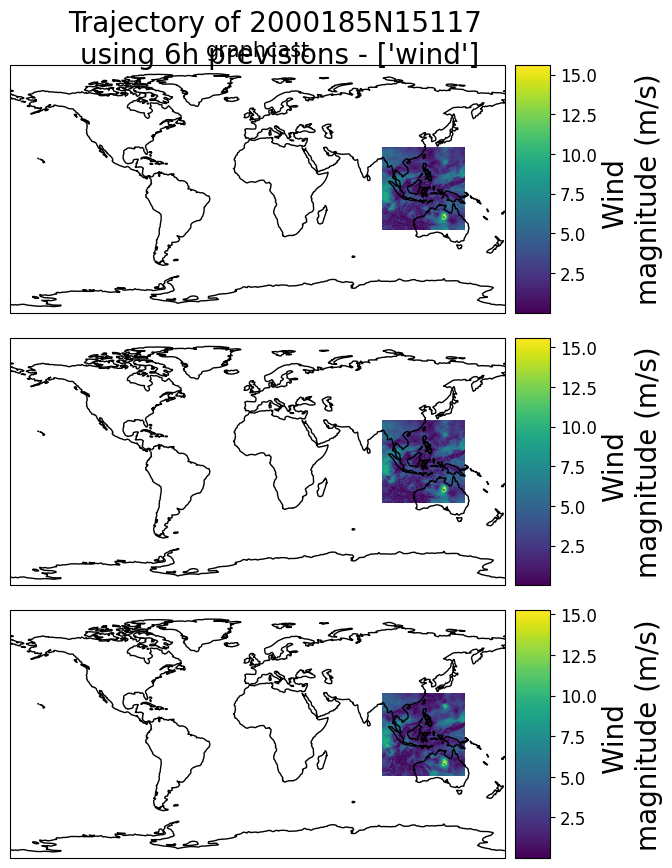

In [3]:
var_name = ["wind"]
follow_track(model_names, tc_id=kai_tak_2000_id, lead_time=lead_time, var_name=var_name, 
            cmap_mslp="Blues", cmap_wind='viridis', max_plots=3, plot_dir="/users/lpoulain/louis/plots/")

In [5]:
import xarray as xr

ds = xr.open_dataset("/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/graphcast/graphcast_2000-07-05T18_to_2000-07-07T12_ldt_42_2000185N15117_small.nc")

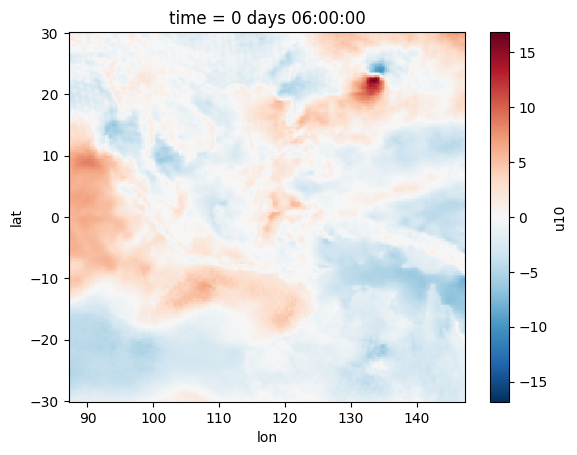

In [9]:
ds.u10[0].plot.imshow()

# Train test

In [29]:
%load_ext autoreload
%autoreload 2

import dataset
from model import CNN_TC, train, test
import torch

In [30]:
splits = {'train_val': 0.8, 'test': 0.2}
val_split = 0.25
model_name = "graphcast"
data_path = "/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/"
mode = "deterministic"

In [ ]:
dataset.split_data(data_path=data_path, model_name=model_name, splits=splits, mode=mode, val_split=val_split)

In [31]:
train_dataset = dataset.TCData(data_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                             small=False, data_type='train', normalize=True, model_name=model_name, mode="deterministic")
val_dataset = dataset.TCData(data_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                             small=False, data_type='val', normalize=True, model_name=model_name, mode="deterministic")
test_dataset = dataset.TCData(data_path="/work/FAC/FGSE/IDYST/tbeucler/default/raw_data/ML_PREDICT/",
                             small=False, data_type='test', normalize=True, model_name=model_name, mode="deterministic")

criterion = torch.nn.MSELoss(reduction='none')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=1, shuffle=False, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=4)

print(f"Train: {len(train_loader.dataset)} samples", f"Val: {len(val_loader.dataset)} samples", f"Test: {len(test_loader.dataset)} samples")
train_dataset.summary()

/work/FAC/FGSE/IDYST/tbeucler/default/louis/TCBench_0.1/scripts/dataset.py:35: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  self.data = [torch.from_numpy(arr).float() for arr in data]


: 

In [4]:
TCmodel = CNN_TC(in_channels=3, out_channels=16)
epochs = 20
optim = torch.optim.Adam(TCmodel.parameters(), lr=0.1)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optim, T_max = epochs, eta_min=0.001)
print(TCmodel)

CNN_TC(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(16, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(4, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm2d(1, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

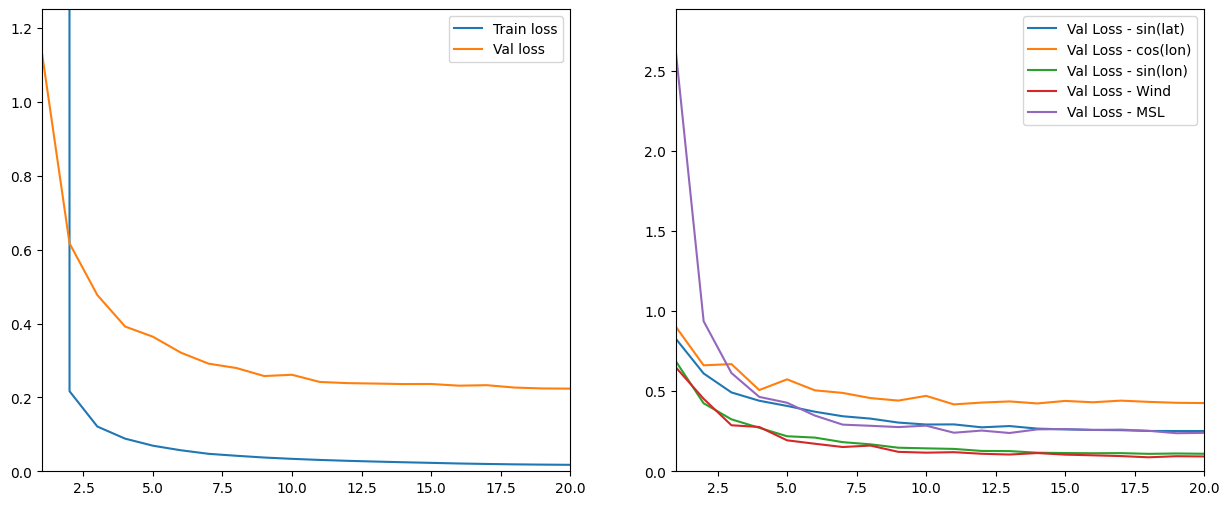

In [5]:
train_losses, val_losses = train(model=TCmodel, train_loader=train_loader, val_loader=val_loader, 
                                 optimizer=optim, scheduler=scheduler, criterion=criterion, device=device, epochs=epochs)

In [7]:
train_losses[-1], val_losses[-1]

(0.02358079618352349, 0.29328700937049923)

In [6]:
test_losses = test(model=TCmodel, test_loader=test_loader, criterion=criterion, device=device)
print(test_losses)

RuntimeError: a Tensor with 5 elements cannot be converted to Scalar